<h2>Extracting and Visualizing Stock Data</h2>

<h4>Description & Goals of the project</h4>

<p>Extracting and displaying data to get the insights is essential in Data Science. The goal of this project is to use diferent techniques to get data about the stocks of different companies:
<ul>
<li>First, using yfinance</li>
<li>Second, using webscraping techniques</li>
</ul>
The findings will be displayed in a graph thanks to a previously defined function.

It is based on the "Python Project for Data Scienc" from the IBM 10-courses series "Data Science Professional Certificate", even though I am going to add some extra features and modify the plotting function.</p>

<h3>1. Import libraries</h3>

Typically, the first step in every code is to import the necessary libraries to carry out the tasks

In [87]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from datetime import datetime

<h3>2. Define a graph function</h3>
<p>Now, we define a function that will plot the data, so we can reuse it. The one provided by the curse is obsolete, so let's redefine it.<br> 
It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.</p>

In [82]:
def make_graph(df, my_legend):
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(5)
    plt.style.use("seaborn-v0_8")
    plt.plot(df['Date'], df['Close'])  # Closing price
    plt.title(f'{my_legend} - Historical Share Price')
    plt.ylabel('Price (Million USD)')
    plt.xlabel('Year')
    # plt.legend(my_legend)
    plt.show()

# print(plt.style.available)   # to show the available styles!!

<h3>3. Use yfinance to Extract Stock Data </h3>
<p>The first method to get data will be yfinance. It's a popular open source library used to access the financial data available on Yahoo Finance.<br>
Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.<br><br>
Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. We set the period parameter to max so we get information for the maximum amount of time.<br><br>
Then, it's good to check the data using the head function, for example.
<p>

In [22]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<p>We might want to clean he data a bit. For example, it's enough to leave the date in the first column and delete the time.</p>

In [7]:
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'], format='%Y-%m-%d')  # we can only use this once: after transformation, it'll output an error
#print(tesla_data['Date'][0:10])
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<h3>4. Use Webscraping to Extract Tesla Revenue Data</h3>
<p>Now, we use a different approach. We'll get the data from the link provided by the course by means of the requests library. The response is saved in the variable html_data and the parsed using beautiful_soup</p>

In [23]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).text
beautiful_soup = BeautifulSoup(html_data, 'html.parser')

<p>Using BeautifulSoup, we extract the table with Tesla Revenue and store it into a dataframe named tesla_revenue. 
The dataframe should have columns Date and Revenue<br>
Here, we have to find all the tables and then access to the table with the index [1] to get all the data we need and adding them to our dataframe.<br>
When this is done, we check again the data with .head().
</p>

In [24]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])  #declare the data frame
my_tables = beautiful_soup.find_all('tbody')  # extract the tables in the object 'my_tables'

for row in my_tables[1].find_all('tr'):
    
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text
    d = {"Date": [date], "Revenue": [revenue]}
    new_df = pd.DataFrame(data=d)
    tesla_revenue = pd.concat([tesla_revenue, new_df], ignore_index=True)

tesla_revenue.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


<p>We clean and format the data by removing the dollar sign and the commas, as well as the null or empty strings. <br>
At the end of the block, add the function .head() to see that everything went as expected.</p>

In [29]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue = tesla_revenue.sort_values('Date', ascending=True)
tesla_revenue.head()

,Date,Revenue
53,2009-06-30,27
52,2009-09-30,46
50,2010-03-31,21
49,2010-06-30,28
48,2010-09-30,31


<h3>5. Repeat the process for another company</h3>
<p>Here, we will repeat the whole process for the company GameStop. In this case, the code is GME</p>

In [92]:
#first, using yfinance
gme = yf.Ticker("GME")
gme_data = gme.history(period='max')
gme_data.reset_index(inplace=True)
gme_data['Date'] = pd.to_datetime(gme_data['Date'], format='%Y-%m-%d')

# get the data and parsing
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data2 = requests.get(url2).text
beautiful_soup2 = BeautifulSoup(html_data2, 'html.parser')

# store the data of the table into a dataframe
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])  #declare the data frame
my_tables2 = beautiful_soup2.find_all('tbody')  # extract the tables in the object 'my_tables2'

for row in my_tables2[1].find_all('tr'):
    
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text
    d2 = {"Date": [date], "Revenue": [revenue]}
    new_df2 = pd.DataFrame(data=d2)
    gme_revenue = pd.concat([gme_revenue, new_df2], ignore_index=True)

# data cleaning and formating
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace('$','').str.replace(',','')
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

#display the last values with .tail() for verification
print(gme_data.tail())
print(gme_revenue.tail())

                          Date       Open       High        Low      Close  \
5509 2024-01-03 00:00:00-05:00  16.299999  16.830000  15.900000  16.690001   
5510 2024-01-04 00:00:00-05:00  16.510000  16.750000  16.309999  16.360001   
5511 2024-01-05 00:00:00-05:00  16.160000  16.520000  15.960000  15.960000   
5512 2024-01-08 00:00:00-05:00  15.780000  16.120001  15.700000  15.790000   
5513 2024-01-09 00:00:00-05:00  15.590000  15.620000  15.120100  15.160000   

       Volume  Dividends  Stock Splits  
5509  4193600        0.0           0.0  
5510  2671500        0.0           0.0  
5511  2615700        0.0           0.0  
5512  3031100        0.0           0.0  
5513  3068757        0.0           0.0  
          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


<h3>6. Plot the graphs </h3>
<p>Visualization is crucial to understand and get insights from the data. <br>
The next step is to show tha data in a proper way, so it's easier to understand them.
For that, we use the function defined at the beggining of the code.<br>
For example, we can plot the historical values of the stocks price at closing</p>

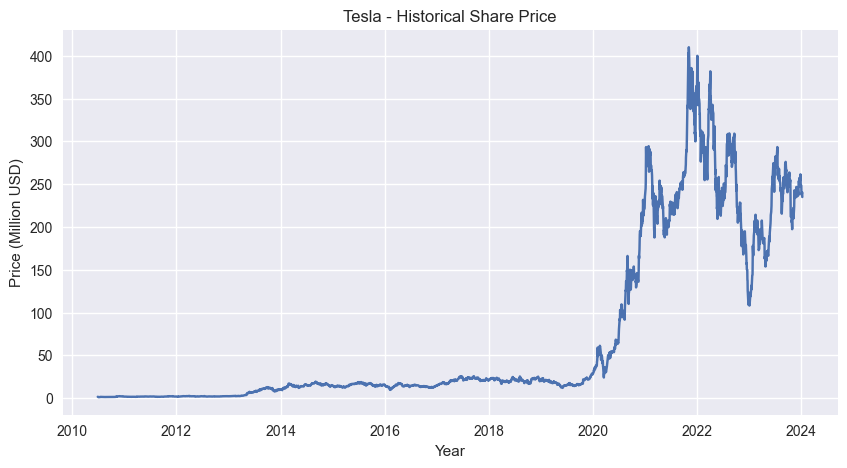

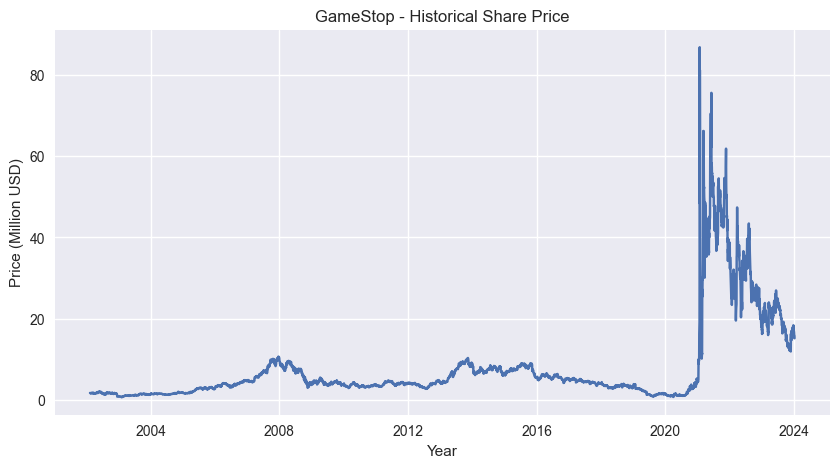

In [93]:
make_graph(tesla_data, 'Tesla')
make_graph(gme_data, 'GameStop')

<p>We can already extract some interesting insights from this graphs. First, if we take a look to Tesla's plot, we can see how the stocks value rocketed in 2020 due to different factors, such as a stock split that made investments more atractive for retail investors. Also, the development of green technologies in the context of climate change has helped to this stratospherical rise.<br><br>
Regardig GameStop, we can see how the short squeez episode influenced the stocks price, producing a rapid and sudden rising, followed by an agressive fall due to excess of short selling</p>

<h3>7. Compare different companies</h3>
<p>Now that we know how to get data using different methods, we can now compare the historical stock values of different companies<br>
We can choose some of them by means of yfinance using their ticker like we did before. Then, declare an empty dataframe and finally filling it up with the companies data.</p>

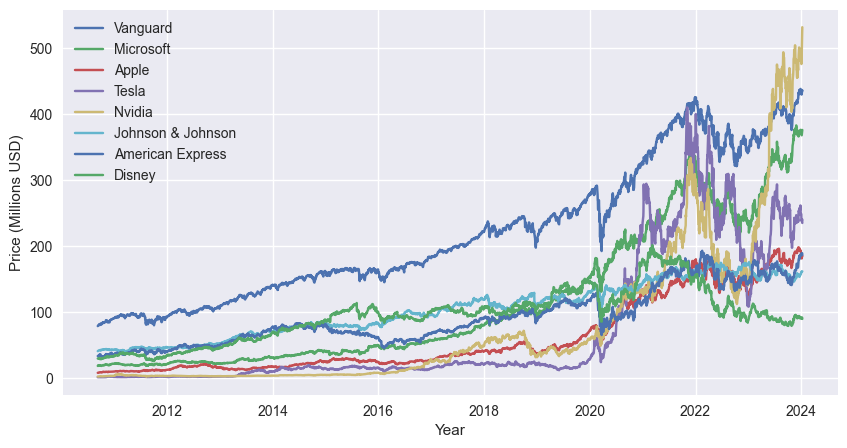

In [94]:
#Let's check the data up to today
today = datetime.now().date().strftime("%Y-%m-%d")  # establish today's date

comp = ['voo', 'msft', 'aapl', 'tsla', 'nvda', 'jnj', 'axp', 'dis']
lgnd = ['Vanguard', 'Microsoft', 'Apple', 'Tesla', 'Nvidia','Johnson & Johnson', 'American Express','Disney']
df = pd.DataFrame()

for company in comp:
    df[company] = yf.Ticker(company).history(start='2007-01-01', end=today).Close

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.style.use("seaborn-v0_8")
plt.plot(df)  # Closing price
plt.ylabel('Price (Millions USD)')
plt.xlabel('Year')
plt.legend(lgnd)
# plt.show()

<p>In this plot, we can see a good comparative between 8 of the world's biggest companies</p>

<h3>8. Conclusions</h3>
As my first big project in Data Science, I've gained some valuable knowledge while developing each and every phase:
<ul>
<li>Methods like web scraping or libraries like yfinance that use public APIs are powerful ways to access important datasets in a relatively easy way. It is crucial though, to understand their functioning, as well as the data types they output. Appling certain methods or functions to some kind of data can lead us to code errors that shouldn't take place if we know the type of data we're dealing with.</li>
<li>The pandas dataframes are essential when dealing with huge datasets. To learn how they work, allows you to get all the outputs and insights you want.They can also help you to understand the data. Many times we have to clean and format the data to be able to work with it. The raw data rarely ever will output precise results.</li>
<li>Visualization methods are needed to get a good picture of the data. Understand concepts like the distribution or the evolution over time of the data are key steps to have a full understanding. This can't be achived without proper visualization techniques, especially if we want to communicate the insights to our colleagues or to the stakeholders.</li>
<li>This exercise also helped me to develop my proficency with Python and Jupyter Notebooks, both widely used in the Data Science field.</li>